## pythonのパッケージ
機械学習をpythonで実行するためによく用いられるパッケージとその基本的な使い方を説明します．

### numpy
ベクトルや行列の計算を高速に行うライブラリ．

In [1]:
import numpy as np

#### 配列の作り方
np.array(リスト)とすることでnumpy.ndarray型のオブジェクトが作成できます．<br>
他にもnp.arange, np.zeros, np.onesなどで特殊な配列を作成することも可能です．

In [2]:
x =np.array([6,1,4])
x

array([6, 1, 4])

In [3]:
type(x)

numpy.ndarray

In [4]:
x.shape

(3,)

In [5]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
A.shape

(2, 3)

In [7]:
y = np.arange(3)
y

array([0, 1, 2])

In [8]:
np.zeros(3), np.ones(5)

(array([0., 0., 0.]), array([1., 1., 1., 1., 1.]))

In [9]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [10]:
# 0から100を10等分．
np.linspace(0,100,10)

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

基本的な統計量の計算はメソッドを用いて計算できます．

In [11]:
x.sum(),x.mean(),x.var(),x.std()

(11, 3.6666666666666665, 4.222222222222222, 2.0548046676563256)

### 多次元配列と線型代数
numpyでは多次元配列に対して行列計算を行うことができます．

In [12]:
A = np.array([[1,0,3],[4,5,0]])
x = np.array([[10],[20],[30]])
A@x

array([[100],
       [140]])

In [13]:
A = np.array([[1,0,3],[4,5,1],[0,8,9]])
np.linalg.inv(A)

array([[ 0.27819549,  0.18045113, -0.11278195],
       [-0.27067669,  0.06766917,  0.08270677],
       [ 0.2406015 , -0.06015038,  0.03759398]])

In [14]:
A =np.array([[1,4],[2,3]])
eigen = np.linalg.eig(A)
eigen

(array([-1.,  5.]), array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

**演習**
$A = \left ( \begin{array}{ccc}
      5 & -4 & -2 \\
      6 & -5 & -2 \\
      3 & -3 & 2
    \end{array}\right )$
について，次の問題を考えてみましょう．<br>
(1) $A$の逆行列の定義を答えてください．<br>
(2) $A^{-1}を$計算し，(1)の定義に従っていることを確認しましょう．<br>
(3) $A$の固有値，固有ベクトルの定義を答えてください．<br>
(4) $A$の固有値，固有ベクトルを計算し，(3)の定義に従っていることを確認しましょう．<br>

#### ブロードキャスト
ベクトルの和や差は2つのベクトルの長さが同じ場合にのみ定義されます．<br>
同様に行列の演算についても，その演算が定義されるかどうかは行列の型によって決まります．<br>
numpyでは通常の方法では演算が定義されない型のベクトルや行列についても，型を適宜修正することによって計算を実行する機能があります．<br>
この機能をブロードキャストと言います．

In [16]:
np.array([1,2])+np.array([10])

array([11, 12])

In [17]:
#これでも同じ
np.array([1,2])+10

array([11, 12])

In [18]:
np.array([[1,2],[3,4]]) + np.array([10,20])

array([[11, 22],
       [13, 24]])

### scipy
NumPyを基盤にした科学計算ライブラリ．<br>
確率，統計，最適化，線型代数，数値積分，フーリエ変換など高度な計算も可能です．

In [20]:
import scipy as sp
from scipy import stats 

### 正規分布
次のようにして，正規分布の確率密度関数，累積分布関数を扱うことができます．

In [21]:
rv = stats.norm()

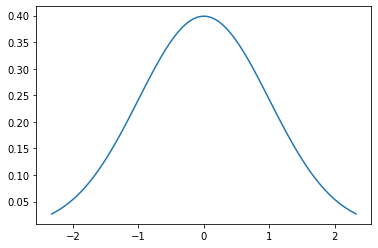

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt 
x =np.linspace(rv.ppf(0.01),
               rv.ppf(0.99), 100)
plt.plot(x, rv.pdf(x))

In [24]:
#定積分
sp.integrate.quad(func=rv.pdf,a=-np.Inf,b=1.96)[0]

0.9750021048517798

### pandas 
データフレームの操作を行うライブラリ．<br>
csvファイルの読み込みや前処理などに用います．

In [25]:
import pandas as pd

In [56]:
df = pd.DataFrame({"x":[1,2,4,3],"y":[5,6,7,8],"z":["A","A","B","B"]})
df

,x,y,z
0,1,5,A
1,2,6,A
2,4,7,B
3,3,8,B


In [57]:
#特定の列だけ取り出せる．
df["x"]

0    1
1    2
2    4
3    3
Name: x, dtype: int64

In [60]:
#存在しない列をしていすると追加できる．
df["new"] = [10,20,30,40]
df

,x,y,z,new
0,1,5,A,10
1,2,6,A,20
2,4,7,B,30
3,3,8,B,40


In [27]:
#各列の要約
df.describe()

,x,y
count,4.000000,4.000000
mean,2.500000,6.500000
std,1.290994,1.290994
min,1.000000,5.000000
25%,1.750000,5.750000
50%,2.500000,6.500000
75%,3.250000,7.250000
max,4.000000,8.000000


In [28]:
df.corr()

,x,y
x,1.0,0.8
y,0.8,1.0


In [29]:
# groupbyメソッドで同じ処理をグループごとに行なうことができる．
g = df.groupby("z")
g.describe()

x                                               y                      \
  count mean       std  min   25%  50%   75%  max count mean       std  min   
z                                                                             
A   2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  5.5  0.707107  5.0   
B   2.0  3.5  0.707107  3.0  3.25  3.5  3.75  4.0   2.0  7.5  0.707107  7.0   

                         
    25%  50%   75%  max  
z                        
A  5.25  5.5  5.75  6.0  
B  7.25  7.5  7.75  8.0

**演習**
scikit-learnに用意されているbostonの住宅価格データを用いて演習を行います．<br>
load_boston().data : 説明変数の値が収められているnumpy配列<br>
load_boston().feature_names : 説明変数の変数名のリスト<br>
load_boston().target : 目的変数(住宅価格)<br>
(1) 目的変数をdfに追加してください．<br>
(2) 目的変数と最も相関の高い説明変数はどれですか．<br>
(3) CHASは0または1の2値をとる変数です．CHAS=1となるデータは何件ありますか？<br>
(4) CHASの値でデータをわけるとき，わけたデータのyの値の平均値はそれぞれいくつですか．

In [86]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
df = pd.DataFrame(boston.data, columns = boston.feature_names) #こういう作り方もできる．

### matplotlib
NumPyを基盤にしたグラフ描画ライブラリ．<br>
データそのものの可視化だけでなく，学習の精度をグラフにまとめることも重要です．


In [34]:
from matplotlib import pyplot as plt

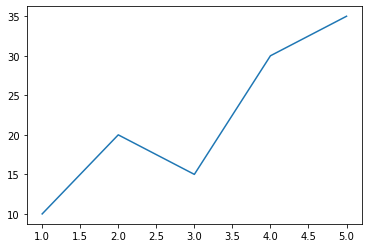

In [35]:
# 折れ線グラフ
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 15, 30, 35])
plt.plot(x,y)

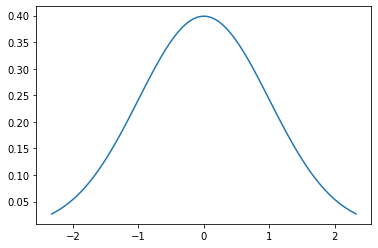

In [23]:
#正規分布のpdf
x =np.linspace(rv.ppf(0.01),
               rv.ppf(0.99), 100)
plt.plot(x, rv.pdf(x))

(array([  5.,  23.,  82., 154., 190., 242., 178.,  96.,  15.,  15.]),
 array([-8.97560361, -7.20126234, -5.42692107, -3.6525798 , -1.87823854,
        -0.10389727,  1.670444  ,  3.44478527,  5.21912654,  6.99346781,
         8.76780908]),
 <a list of 10 Patch objects>)

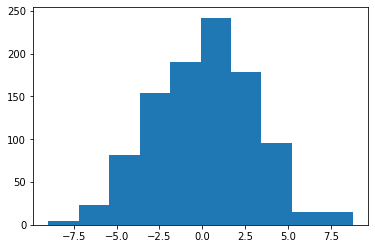

In [42]:
# ヒストグラム
rv = stats.norm(loc= 0, scale=3)
rvs = rv.rvs(size = 1000)
plt.hist(rvs)

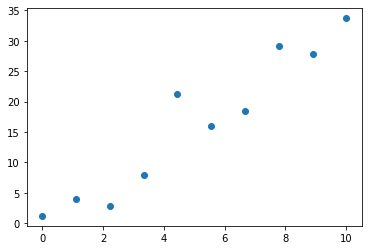

In [43]:
# 散布図
x = np.linspace(0, 10, 10)
y = 3*x + 1 + rv.rvs(size=10)
plt.scatter(x,y)

Text(0, 0.5, 'y')

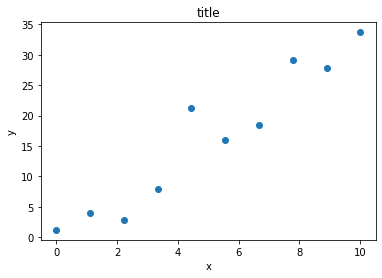

In [72]:
# タイトルやラベルをつけると丁寧
plt.scatter(x,y)
plt.title('title')
plt.xlabel('x') 
plt.ylabel('y')

**演習**
scikit-learnに用意されているbostonの住宅価格データを用いて演習を行います．<br>
load_boston().data : 説明変数の値が収められているnumpy配列<br>
load_boston().feature_names : 説明変数の変数名のリスト<br>
load_boston().taeget : 目的変数(住宅価格)<br>
(1) 目的変数のヒストグラムを作ってください．<br>
(2) LSTATと目的変数の散布図を作ってください．<br>

### scikit-learn
機械学習を行うためのライブラリ．<br>
学習の実行以外に，trainデータとtestデータへの分割やクロスバリデーション，精度指標の計算など，機械学習に必要な関数が揃っています．

In [81]:
X = df[['LSTAT']].values
y = df['y'].values

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# 線形回帰
from sklearn.linear_model import LinearRegression
LR = LinearRegression()


LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#精度の確認
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=LR.predict(X_test))

0.5392302504701003

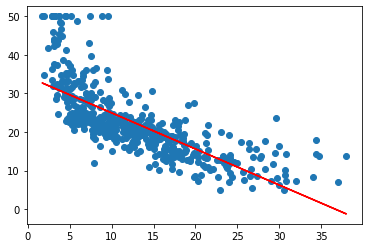

In [85]:
plt.scatter(X, Y)         
plt.plot(X_train, LR.predict(X_train), color = 'red') 